<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/AIML-LAB/blob/main/LAB_009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RANDOM FOREST

In [1]:
import matplotlib.pyplot as mt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
US=pd.read_csv("/content/loan_data.csv")
US.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [6]:
US.info(verbose=True)
# verbose used to arrange the data in the readable form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
US.describe(percentiles=[.25,.5,.75,.9])

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
90%         1.000000     0.156500   659.370000       11.675457    22.000000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
90%     767.000000        7830.041667  3.522760e+04    87.700000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
90%          4.000000     1.000000     0.000000        1.000000  
max         33.000000    13.000000     5.000000        1.000000

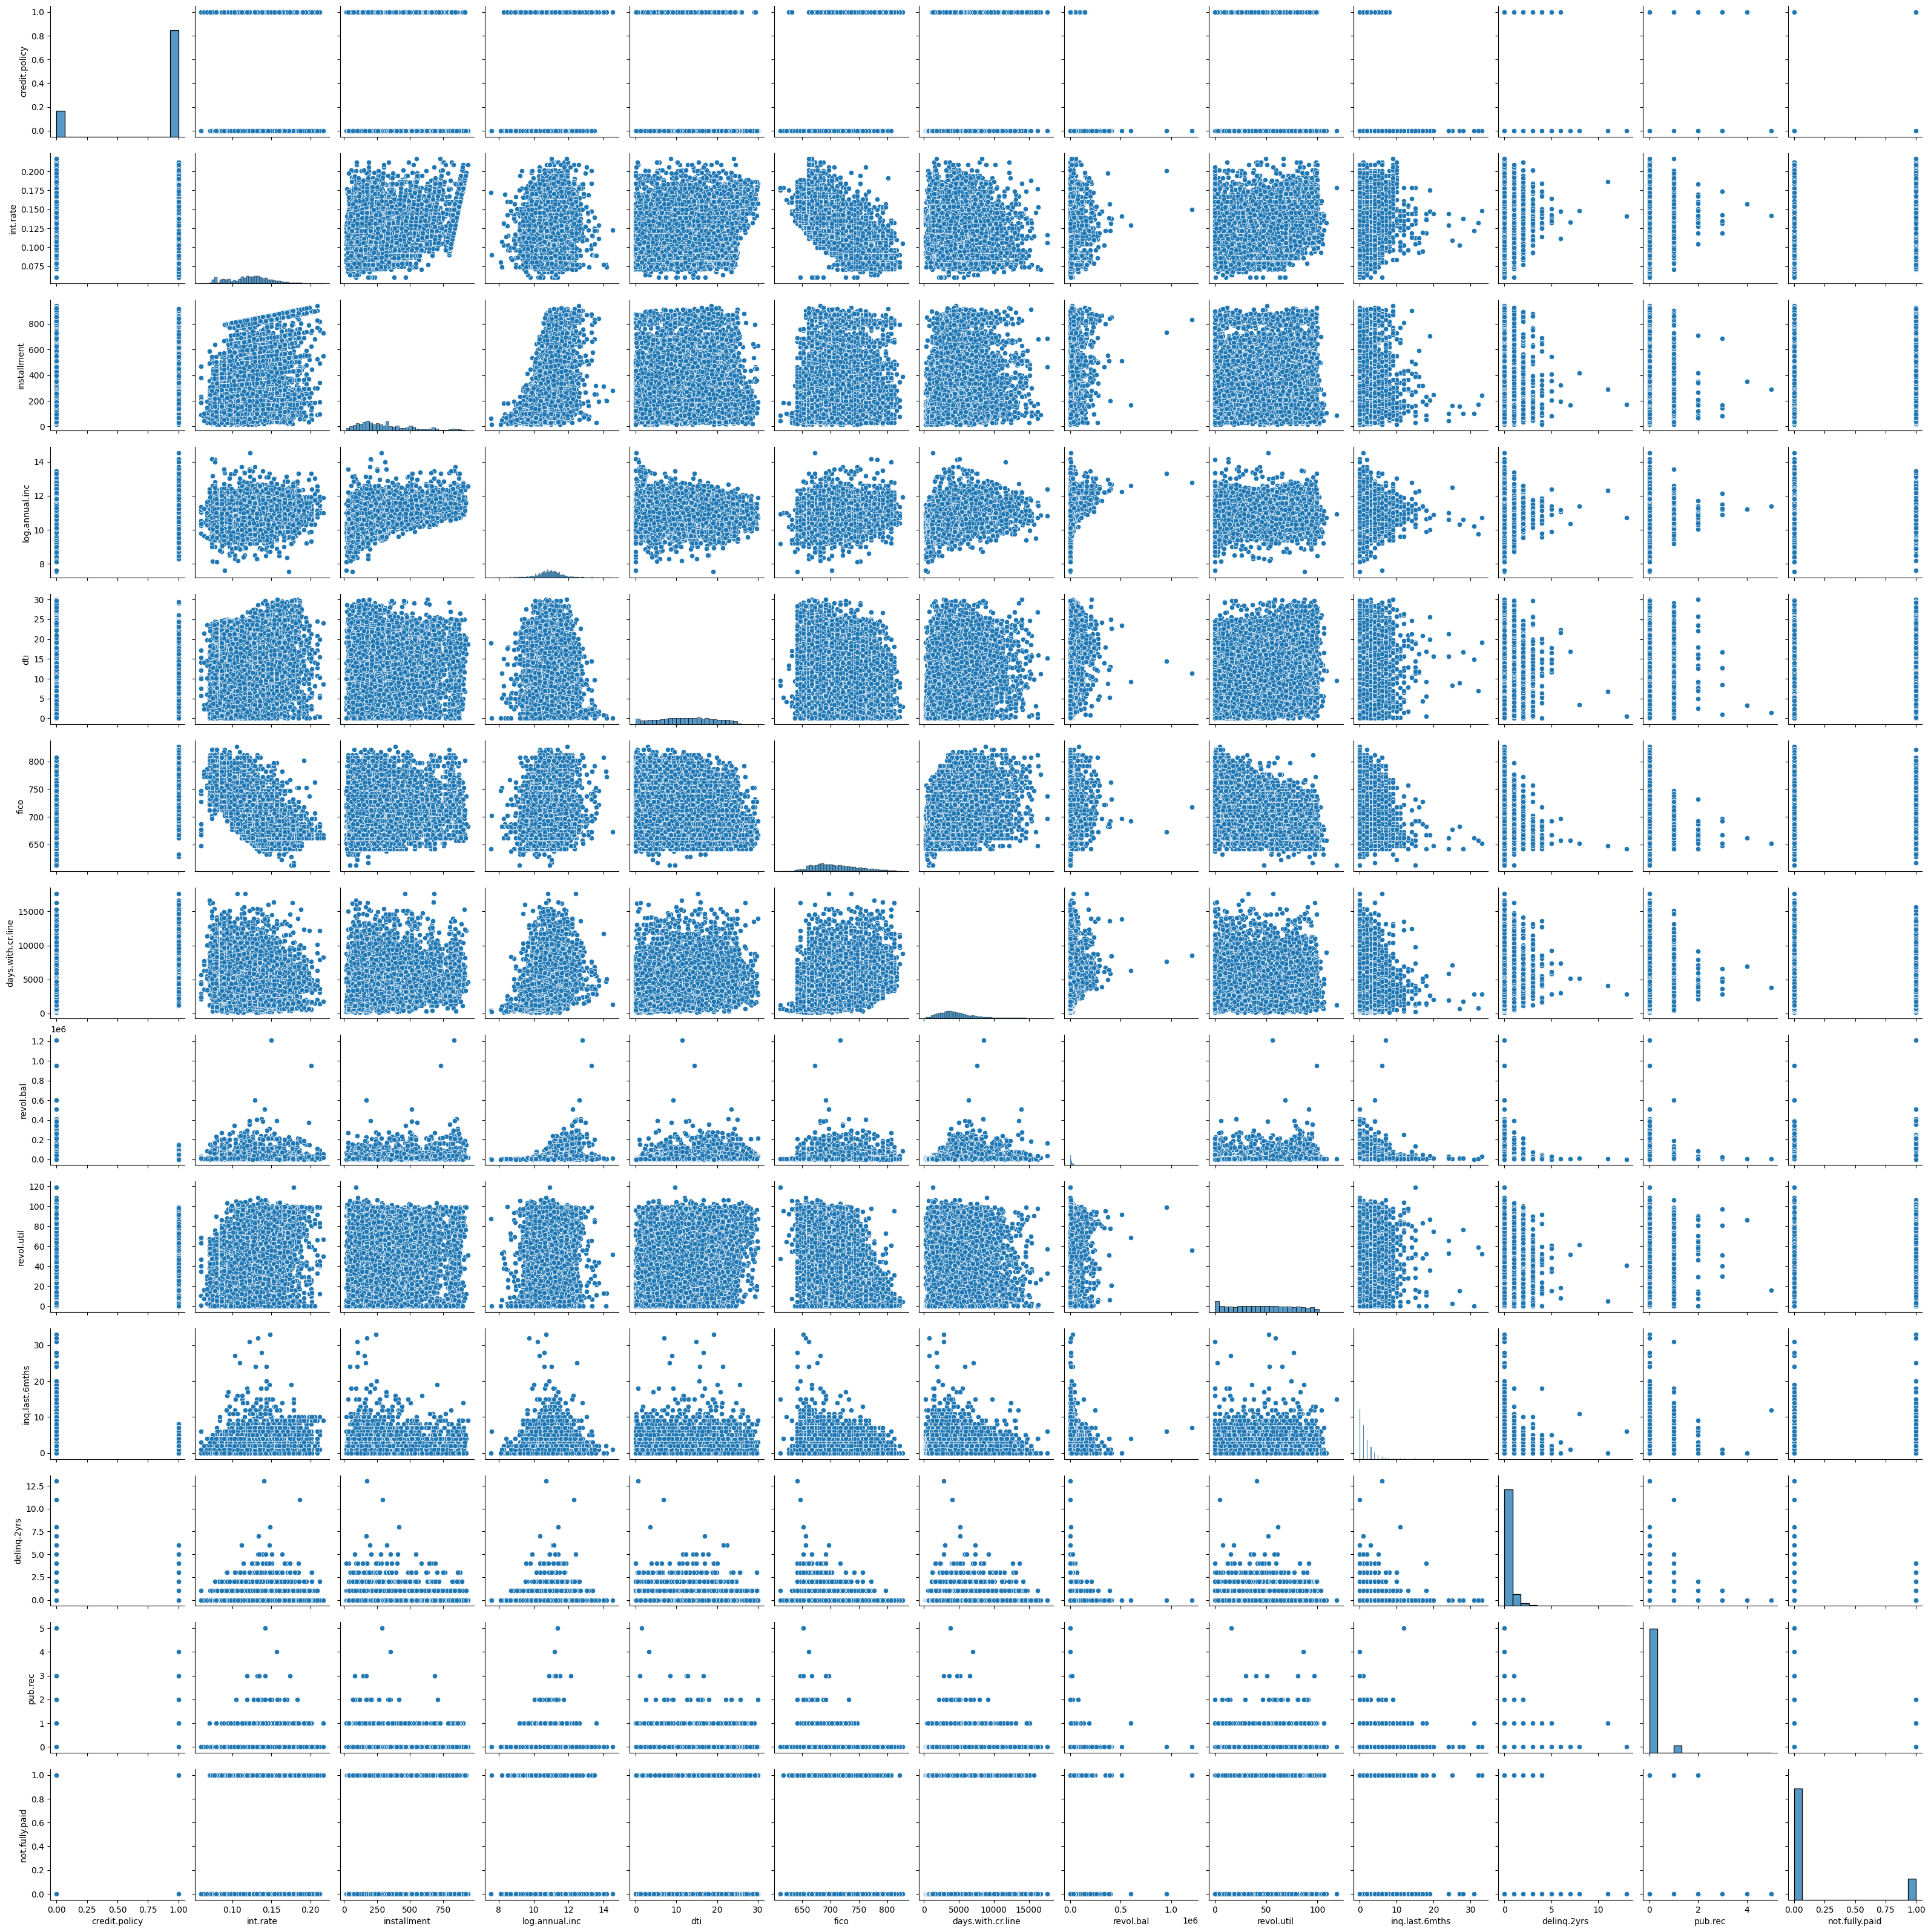

In [11]:
sns.pairplot(US)

# Dislpay the count of credit approals done by company

In [19]:
print("Following is breakup of credit approval status:\n 1 means approved credit, 0 means not approed.\n")
print(US['credit.policy'].value_counts())

Following is breakup of credit approval status:
 1 means approved credit, 0 means not approed.

1    7710
0    1868
Name: credit.policy, dtype: int64

0    8045
1    1533
Name: not.fully.paid, dtype: int64


Text(0.5, 0, 'Fico score')

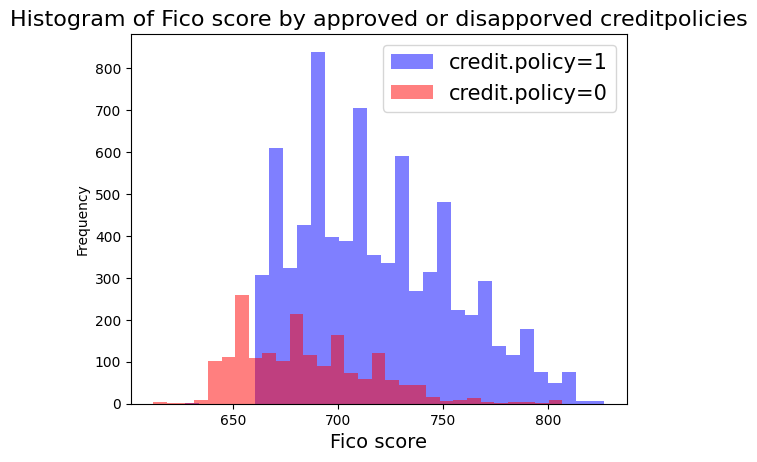

In [26]:
US[US['credit.policy'] == 1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='credit.policy=1')
US[US['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='credit.policy=0')
mt.legend(fontsize=15)
mt.title("Histogram of Fico score by approved or disapporved creditpolicies",fontsize=16)
mt.xlabel("Fico score",fontsize=14)

# PRESENECE AND ABSENCE OF STATISTICAL DIFFERENCE OF VARIOUS FACTORS BETWEEN CREDIT APPROVAL STATUS

Text(0, 0.5, 'INTEREST RATE')

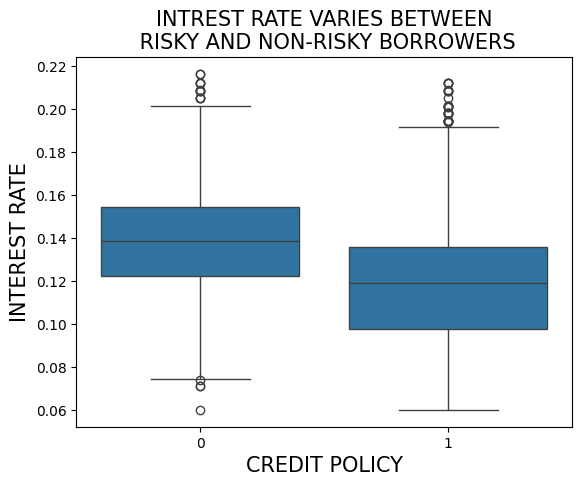

In [39]:
sns.boxplot(x=US['credit.policy'],y=US['int.rate'])
mt.title("INTREST RATE VARIES BETWEEN\n RISKY AND NON-RISKY BORROWERS",fontsize=15)
mt.xlabel("CREDIT POLICY",fontsize=15)
mt.ylabel("INTEREST RATE",fontsize=15)

Text(0, 0.5, 'INTEREST RATE')

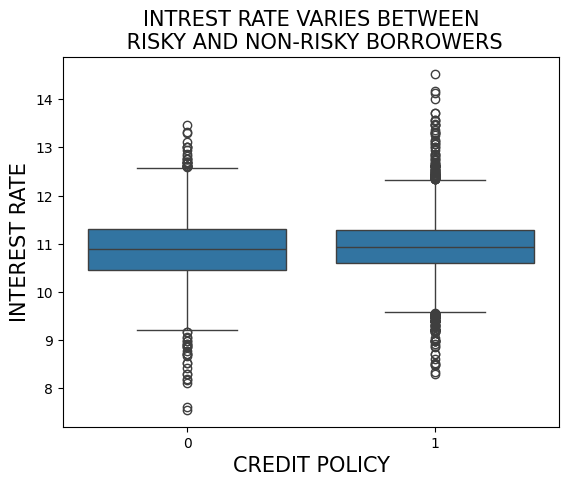

In [40]:
sns.boxplot(x=US['credit.policy'],y=US['log.annual.inc'])
mt.title("INTREST RATE VARIES BETWEEN\n RISKY AND NON-RISKY BORROWERS",fontsize=15)
mt.xlabel("CREDIT POLICY",fontsize=15)
mt.ylabel("INTEREST RATE",fontsize=15)

Text(0, 0.5, 'INTEREST RATE')

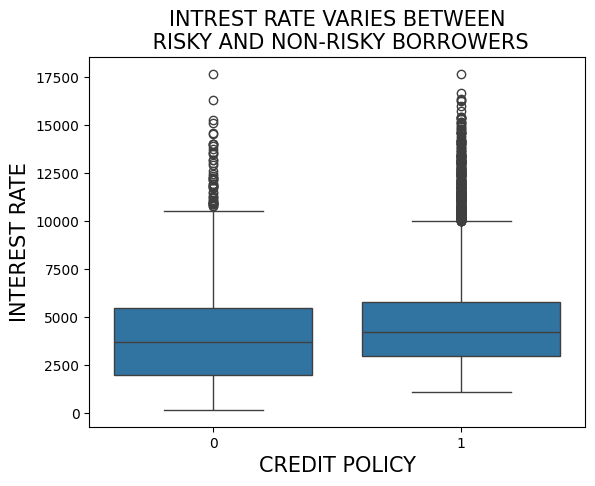

In [41]:
sns.boxplot(x=US['credit.policy'],y=US['days.with.cr.line'])
mt.title("INTREST RATE VARIES BETWEEN\n RISKY AND NON-RISKY BORROWERS",fontsize=15)
mt.xlabel("CREDIT POLICY",fontsize=15)
mt.ylabel("INTEREST RATE",fontsize=15)

Text(0, 0.5, 'INTEREST RATE')

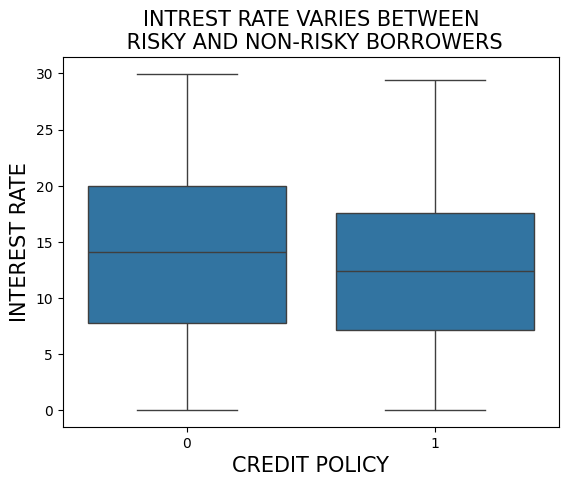

In [42]:
sns.boxplot(x=US['credit.policy'],y=US['dti'])
mt.title("INTREST RATE VARIES BETWEEN\n RISKY AND NON-RISKY BORROWERS",fontsize=15)
mt.xlabel("CREDIT POLICY",fontsize=15)
mt.ylabel("INTEREST RATE",fontsize=15)

Text(0.5, 0, 'purpose')

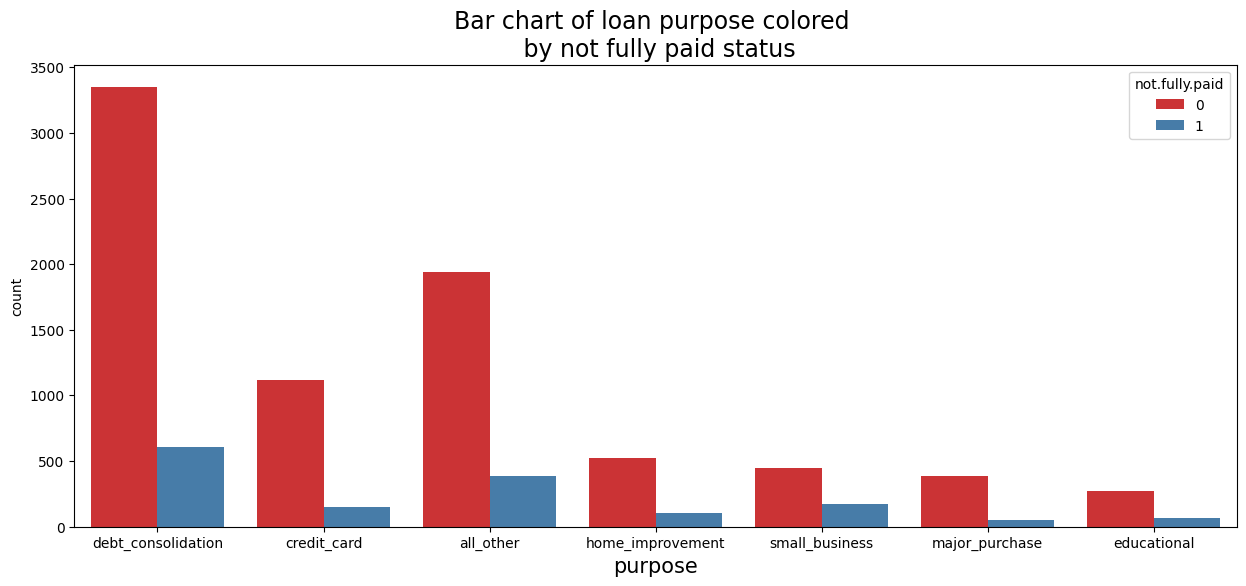

In [47]:
mt.figure(figsize=(15,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=US,palette='Set1')
mt.title('Bar chart of loan purpose colored \n by not fully paid status',fontsize=17)
mt.xlabel("purpose",fontsize=15)

# Trend between fico score and intrest rate

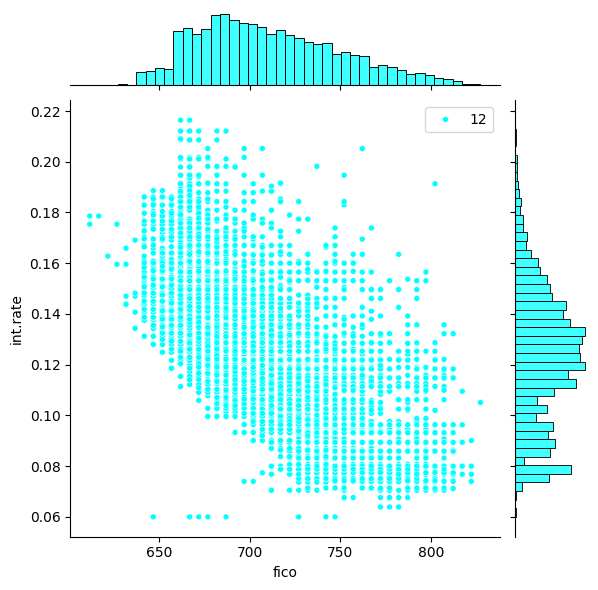

In [49]:
sns.jointplot(x='fico',y='int.rate',data=US,color='aqua',size=12) #it is able to join the x and y (jointplot)

# Trend between purpose score and intrest rate

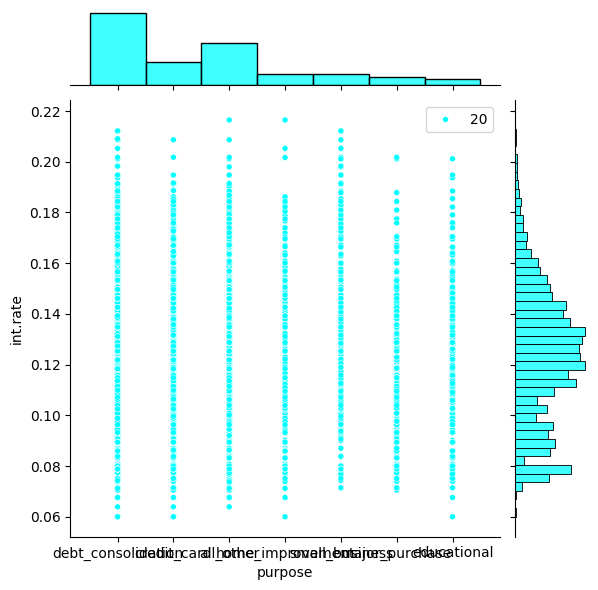

In [51]:
sns.jointplot(x='purpose',y='int.rate',data=US,color='aqua',size=12)

# Trend between credit.policy score and intrest rate

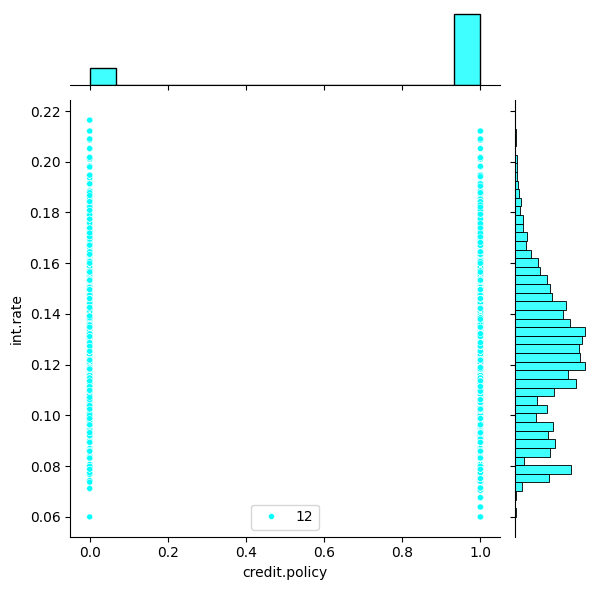

In [52]:
sns.jointplot(x='credit.policy',y='int.rate',data=US,color='aqua',size=12)

# implot to see if the trend differed b/w not.fully.paid and credit.policy


<Figure size 1400x700 with 0 Axes>

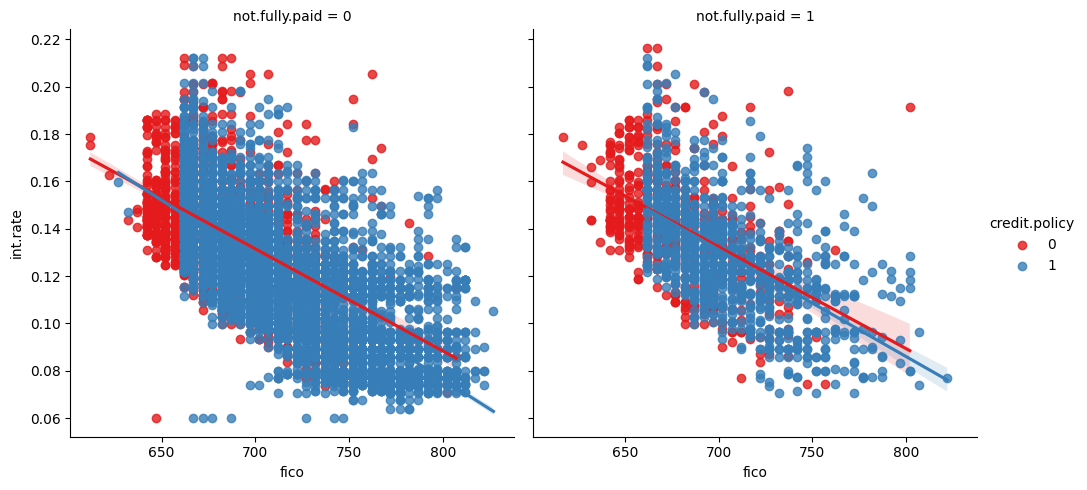

In [58]:
mt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=US,hue='credit.policy',col='not.fully.paid',palette='Set1')

# setting up the data
# categorical feature

 the purpose columns as categorical. we transform then using dummy

In [59]:
df_final = pd.get_dummies(US,['purpose'],drop_first=True)

In [60]:
df_final.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

# TRAIN TEST SPLIT

In [94]:
from sklearn.model_selection import train_test_split
X=df_final.drop('not.fully.paid',axis=1)
y=df_final['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [95]:
X_train.shape,y_test.shape

((6704, 18), (2874,))

# Training a decision tree model

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=None)# creating a instance dtree for  DecisionTreeClassifier

In [98]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# PREDICTION AND EVALUATION FOR THE DECISION TREE

In [99]:
predictions=dtree.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2425
           1       0.21      0.24      0.23       449

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



In [102]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print("Accuracy of predicition:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2034  391]
 [ 342  107]]
Accuracy of predicition: 0.745


# Training the randomforest model

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc=RandomForestClassifier(n_estimators=600)

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# prediction

In [107]:
rfc_pred=rfc.predict(X_test)

In [108]:
cr=classification_report(y_test,rfc_pred)

In [109]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2425
           1       0.42      0.02      0.04       449

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [110]:
cm=confusion_matrix(y_test,rfc_pred)
print(cm)
print("Accuracy of predicition:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2411   14]
 [ 439   10]]
Accuracy of predicition: 0.842
